# Topic: Naive Bayes Classifier

Md Kamran Ahmad

ID:160103020033

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from pprint import pprint
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [5]:
iris =  datasets.load_iris() 
x = iris.data 
y = iris.target

print(x[:3])
print(y[:20])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


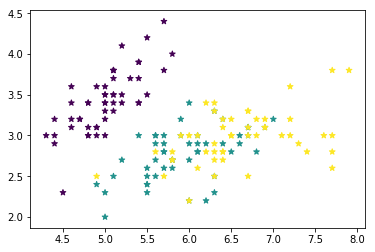

In [6]:
plt.scatter(x[:,0],x[:,1],marker='*', c=y) 
plt.show()

In [7]:
Xa= np.c_[np.ones(x.shape[0]), x]
print(Xa[:5])

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]]


In [8]:
#calculate weighted sum
def linear_regression(x,w):
    val=0
    for ix,iy in zip(x,w):
        val+=ix*iy
    return val


#decide -1 or 1
def activate(val):
    return np.sign(val)


def predict(X, w):
    hp=[]
    for x in X: 
        lr=linear_regression(x,w)
        h=activate(lr)
        hp.append(h)
    return hp


def get_miss_indexes(py, y):
    miss=[]
    for i in range(len(y)):
        if py[i]!=y[i]:
            miss.append(i)
    return miss


#a variation. using epoch and learning rate
def perceptron_train2(X, y):
    w = np.random.rand(5)
    py=predict(X,w)
    miss=get_miss_indexes(py,y) 
    eta=0.1
    epoch=5000
    for i in range(epoch):
        if len(miss)==0:             #all data are classified.
            break
        rnd=np.random.choice(miss)
        rx=X[rnd]
        ry=y[rnd]
        w=w+eta*rx*ry
        py=predict(X,w)
        miss=get_miss_indexes(py,y)
    return w

In [9]:
w = np.random.rand(5)
print(w)
py=predict(Xa,w)
print(py)

[0.61239743 0.37760671 0.40292391 0.04265783 0.20575718]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [10]:
miss=get_miss_indexes(py,y)
print(miss)
print('total miss classification=', len(miss), 'total=',len(y))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
total miss classification= 100 total= 150


In [11]:
rnd=np.random.choice(miss)
print(rnd)
rx=Xa[rnd]                 #Xa er random 
ry=y[rnd]                  #y er random
print(rx)
print(ry)

149
[1.  5.9 3.  5.1 1.8]
2


In [12]:
w1=perceptron_train2(Xa,y)
print(w1)

[ 507.51585689 3338.58828291 1510.16316746 2813.43795336 1029.12853694]


In [13]:
py=predict(Xa,w1)
print(py)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
